<a href="https://colab.research.google.com/github/dayothompson/ML_Project/blob/working_branch/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the csv file 
calgary_listing = pd.read_csv('https://dayotestdb.s3.us-east-2.amazonaws.com/calgary_listings.csv')
score_df = pd.read_csv('https://dayotestdb.s3.us-east-2.amazonaws.com/score_df.csv')

In [3]:
calgary_listing.head()

,price,postal_code,address,mls,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,lot_size,basement,garage
0,219900,T2Y 3G2,", 22 Shawbrooke Court SW",A1045249,2.0,2.0,1.0,1109.0,townhouse,50.906640,-114.092,1998.0,22.0,15.44,950.87,na,1.0,0.0
1,539000,T2E 2Z9,1 - 1510 CENTRE A ST NE,C4306021,2.0,2.0,1.0,1448.0,townhouse,51.065644,-114.061,NaN,NaN,2.47,2330.70,na,0.0,1.0
2,549000,T2N 3R3,1 - 1718 KENSINGTON RD NW,A1029496,3.0,3.0,1.0,1211.0,townhouse,51.052786,-114.098,2018.0,2.0,1.89,2373.94,na,0.0,1.0
3,394000,T3E 1V3,1 - 1938 24A ST SW,A1034579,2.0,2.0,1.0,1046.0,townhouse,51.036421,-114.118,2007.0,13.0,3.22,1703.70,na,0.0,1.0
4,285000,T2S 0L1,1 - 210 25 AVE SW,A1017109,2.0,1.0,NaN,849.0,condo,51.030731,-114.067,2006.0,14.0,1.65,1232.38,NaN,0.0,1.0


In [4]:
score_df.head()

,postal_code,walk_score,bike_score,transit_score
0,T2Y 3G2,17,62,39
1,T2E 2Z9,82,95,58
2,T2N 3R3,74,98,61
3,T3E 1V3,55,90,60
4,T2S 0L1,72,97,58


In [18]:
house_info = pd.merge(calgary_listing, score_df, on='postal_code')
house_info.head()

,price,postal_code,address,mls,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,lot_size,basement,garage,walk_score,bike_score,transit_score
0,219900,T2Y 3G2,", 22 Shawbrooke Court SW",A1045249,2.0,2.0,1.0,1109.0,townhouse,50.906640,-114.092,1998.0,22.0,15.44,950.87,na,1.0,0.0,17,62,39
1,539000,T2E 2Z9,1 - 1510 CENTRE A ST NE,C4306021,2.0,2.0,1.0,1448.0,townhouse,51.065644,-114.061,NaN,NaN,2.47,2330.70,na,0.0,1.0,82,95,58
2,549000,T2N 3R3,1 - 1718 KENSINGTON RD NW,A1029496,3.0,3.0,1.0,1211.0,townhouse,51.052786,-114.098,2018.0,2.0,1.89,2373.94,na,0.0,1.0,74,98,61
3,394000,T3E 1V3,1 - 1938 24A ST SW,A1034579,2.0,2.0,1.0,1046.0,townhouse,51.036421,-114.118,2007.0,13.0,3.22,1703.70,na,0.0,1.0,55,90,60
4,285000,T2S 0L1,1 - 210 25 AVE SW,A1017109,2.0,1.0,NaN,849.0,condo,51.030731,-114.067,2006.0,14.0,1.65,1232.38,NaN,0.0,1.0,72,97,58


## **Analyzing Data**

In [19]:
#house_info = house_info[house_info["price"] < 1500000]
len(house_info)

1982

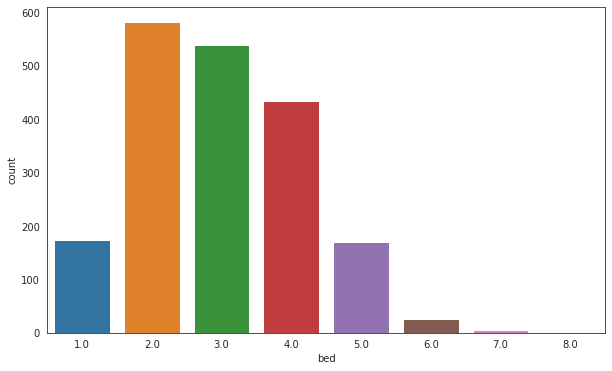

In [20]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.countplot(x="bed", data=house_info)

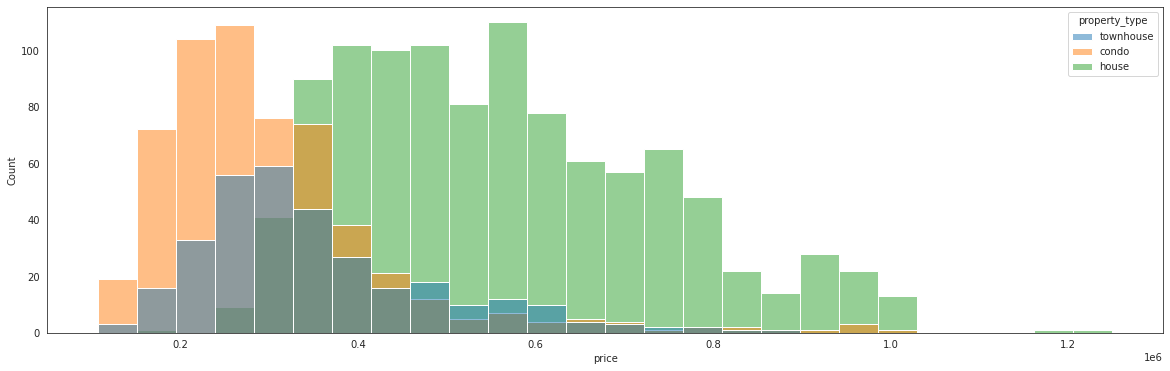

In [21]:
plt.figure(figsize=(20, 6))
sns.histplot(data=house_info, x="price", hue="property_type")

# **Data Wrangling**

In [22]:
house_info.isnull().sum()

price                   0
postal_code             0
address                 0
mls                     0
bed                    50
full_bath              50
half_bath            1028
property_area          36
property_type          58
latitude               34
longitude              34
year_built            357
years_old             357
distance_downtown      34
monthly_payments       34
lot_size              561
basement                0
garage                  0
walk_score              0
bike_score              0
transit_score           0
dtype: int64

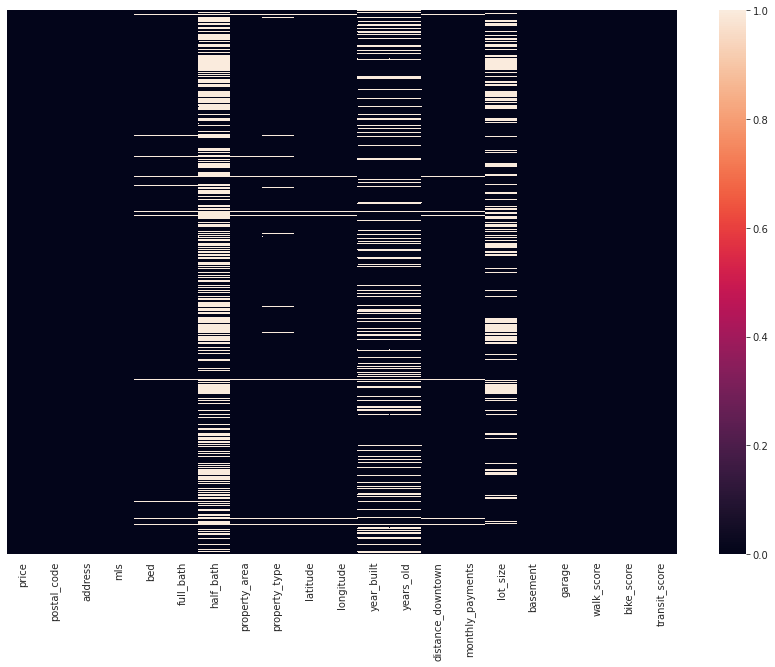

In [24]:
sns.set_style('white')
plt.figure(figsize=(15, 10))
sns.heatmap(data=house_info.isnull(), yticklabels=False)

In [25]:
# Replace nan values with average years_old and 0

# house_info['years_old']=house_info['years_old'].replace(np.nan,house_info['years_old'].mean())
house_info['half_bath']=house_info['half_bath'].replace(np.nan,0)
house_info['lot_size']=house_info['lot_size'].replace("na",0)
house_info['lot_size']=house_info['lot_size'].replace("Unknown",0)
# house_info['walk_score']=house_info['walk_score'].replace(np.nan,0)
# house_info['bike_score']=house_info['bike_score'].replace(np.nan,0)
# house_info['transit_score']=house_info['transit_score'].replace(np.nan,0)
# house_info['lot_size']=house_info['lot_size'].replace(np.nan,0)
# house_info = house_info.dropna(subset=['bed', 'full_bath', 'property_area', 'property_type', 'years_old'])
# house_info = house_info.dropna()

In [26]:
house_info.lot_size.fillna(house_info.property_area, inplace=True)
# data_raw['lot_size'] = pd.to_numeric(data_raw['lot_size'])
# data_raw.head()

In [27]:
house_info = house_info.dropna()

In [28]:
house_info.isnull().sum()

price                0
postal_code          0
address              0
mls                  0
bed                  0
full_bath            0
half_bath            0
property_area        0
property_type        0
latitude             0
longitude            0
year_built           0
years_old            0
distance_downtown    0
monthly_payments     0
lot_size             0
basement             0
garage               0
walk_score           0
bike_score           0
transit_score        0
dtype: int64

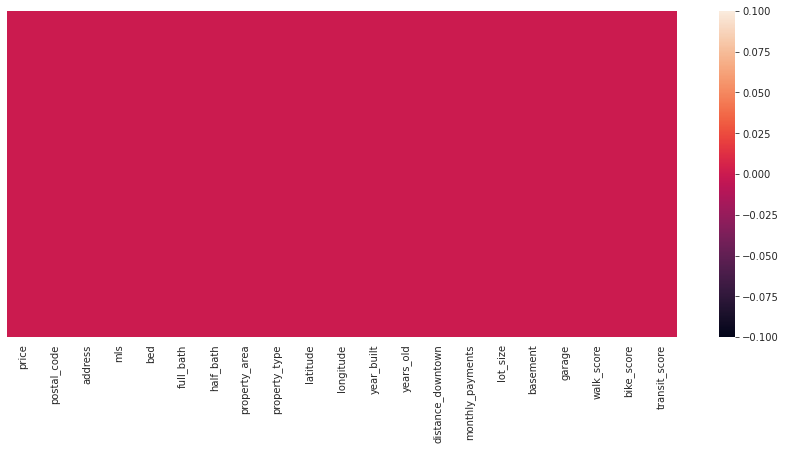

In [29]:
sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.heatmap(data=house_info.isnull(), yticklabels=False)

In [30]:
house_info.head()

,price,postal_code,address,mls,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,lot_size,basement,garage,walk_score,bike_score,transit_score
0,219900,T2Y 3G2,", 22 Shawbrooke Court SW",A1045249,2.0,2.0,1.0,1109.0,townhouse,50.906640,-114.092,1998.0,22.0,15.44,950.87,0,1.0,0.0,17,62,39
2,549000,T2N 3R3,1 - 1718 KENSINGTON RD NW,A1029496,3.0,3.0,1.0,1211.0,townhouse,51.052786,-114.098,2018.0,2.0,1.89,2373.94,0,0.0,1.0,74,98,61
3,394000,T3E 1V3,1 - 1938 24A ST SW,A1034579,2.0,2.0,1.0,1046.0,townhouse,51.036421,-114.118,2007.0,13.0,3.22,1703.70,0,0.0,1.0,55,90,60
4,285000,T2S 0L1,1 - 210 25 AVE SW,A1017109,2.0,1.0,0.0,849.0,condo,51.030731,-114.067,2006.0,14.0,1.65,1232.38,849,0.0,1.0,72,97,58
5,439000,T2S 2Z2,1 - 24 34 AVE SW,A1043468,3.0,2.0,1.0,1126.0,townhouse,51.023518,-114.061,1982.0,38.0,2.55,1898.29,0,0.0,0.0,36,70,53


# **One-hot encoding**

In [31]:
prop_area = pd.get_dummies(house_info["property_type"])
prop_area.head()

,condo,house,townhouse
0,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
5,0,0,1


## **Merge tables**

In [32]:
table_df = pd.concat([house_info, prop_area], axis=1)
table_df.head()

,price,postal_code,address,mls,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,lot_size,basement,garage,walk_score,bike_score,transit_score,condo,house,townhouse
0,219900,T2Y 3G2,", 22 Shawbrooke Court SW",A1045249,2.0,2.0,1.0,1109.0,townhouse,50.906640,-114.092,1998.0,22.0,15.44,950.87,0,1.0,0.0,17,62,39,0,0,1
2,549000,T2N 3R3,1 - 1718 KENSINGTON RD NW,A1029496,3.0,3.0,1.0,1211.0,townhouse,51.052786,-114.098,2018.0,2.0,1.89,2373.94,0,0.0,1.0,74,98,61,0,0,1
3,394000,T3E 1V3,1 - 1938 24A ST SW,A1034579,2.0,2.0,1.0,1046.0,townhouse,51.036421,-114.118,2007.0,13.0,3.22,1703.70,0,0.0,1.0,55,90,60,0,0,1
4,285000,T2S 0L1,1 - 210 25 AVE SW,A1017109,2.0,1.0,0.0,849.0,condo,51.030731,-114.067,2006.0,14.0,1.65,1232.38,849,0.0,1.0,72,97,58,1,0,0
5,439000,T2S 2Z2,1 - 24 34 AVE SW,A1043468,3.0,2.0,1.0,1126.0,townhouse,51.023518,-114.061,1982.0,38.0,2.55,1898.29,0,0.0,0.0,36,70,53,0,0,1


In [54]:
df = table_df[['price', 'bed', 'full_bath', 'half_bath', 'property_area', 'years_old', 'distance_downtown',
                     'lot_size','basement','garage', 'walk_score', 'bike_score', 'transit_score', 'house','condo','townhouse', ]]
df.head()

,price,bed,full_bath,half_bath,property_area,years_old,distance_downtown,lot_size,basement,garage,walk_score,bike_score,transit_score,house,condo,townhouse
0,219900,2.0,2.0,1.0,1109.0,22.0,15.44,0,1.0,0.0,17,62,39,0,0,1
2,549000,3.0,3.0,1.0,1211.0,2.0,1.89,0,0.0,1.0,74,98,61,0,0,1
3,394000,2.0,2.0,1.0,1046.0,13.0,3.22,0,0.0,1.0,55,90,60,0,0,1
4,285000,2.0,1.0,0.0,849.0,14.0,1.65,849,0.0,1.0,72,97,58,0,1,0
5,439000,3.0,2.0,1.0,1126.0,38.0,2.55,0,0.0,0.0,36,70,53,0,0,1


In [ ]:
# df.drop(df.loc[df['lot_size']== 'naOc'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '0Occ'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '1 - '].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '979O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '775O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '85Oc'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '282O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '600O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '806O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '436O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '319O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== '493O'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== 'naOc'].index, inplace=True)
# df.drop(df.loc[df['lot_size']== 'naOc'].index, inplace=True)

In [55]:
df['lot_size'] = pd.to_numeric(df['lot_size'])

In [56]:
df.dtypes

price                  int64
bed                  float64
full_bath            float64
half_bath            float64
property_area        float64
years_old            float64
distance_downtown    float64
lot_size             float64
basement             float64
garage               float64
walk_score             int64
bike_score             int64
transit_score          int64
house                  uint8
condo                  uint8
townhouse              uint8
dtype: object

In [73]:
len(df)

1577

# **Load to Postgres db**

In [74]:
from sqlalchemy import create_engine

rds_connection_string = "hexbstnnfbqjwk:13f84410f3efc3df8c053dd3452713a5e63bafe4a7dad292256ae514193d2784@ec2-34-238-26-109.compute-1.amazonaws.com:5432/d1jfbocoh8eqgo"
engine = create_engine(f'postgresql://{rds_connection_string}')

df.to_sql(name= "listings", con=engine, if_exists="replace", index=False)

## **Train Data**

In [58]:
X = df.drop('price', axis=1)
y = df['price']

In [59]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)



#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train_minmax,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top_features = featureScores.nlargest(10,'Score')
print(top_features)  #print best features

         Specs       Score
13       condo  529.484535
14   townhouse  503.669618
12       house  378.639259
7     basement  336.110807
8       garage  210.353902
2    half_bath  175.311264
1    full_bath  143.851812
9   walk_score   98.105083
0          bed   96.482126
4    years_old   89.665694


In [61]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
# Fit the model to the training data and calculate the score for the training data

model.fit(X_train_minmax, y_train)
training_score = model.score(X_train_minmax, y_train)

print(f"Training Score: {training_score}")

Training Score: 0.7461935971351074


## **Test Data**

In [63]:
# Calculate the score for the testing data

testing_score = model.score(X_test_minmax, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.7469952186397636


## **Linear Regression Model**

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
regr.coef_

array([-8.08963446e+03,  5.35201567e+04,  3.39174415e+03,  1.86100534e+02,
       -1.60857384e-01, -1.19539197e+04,  2.79456535e+00, -1.42718923e+03,
        4.16786666e+04, -6.73534275e+02,  6.12762842e+02, -2.66021501e+02,
        6.54765943e+04, -3.37737955e+04, -3.17027988e+04])

In [66]:
regr.intercept_

162733.62751620263

In [67]:
# Predict the price of a townhouse with the following features

# bed = 3
# full_bath = 2
# half_bath = 0
# property_area = 1500
# years_old = 15
# distance_downtown = 12.554

regr.predict([[3, 2, 1, 1500, 15, 15, 2001, 1, 1, 50, 50, 35, 1, 0, 0]])

array([447707.04690012])

In [47]:
# Another sample

# regr.predict([[3, 3, 0, 1200, 0, 0, 1, 15, 14.2, 50, 50, 50, 1800, 0, 0]])

array([309585.5343946])

Text(0.5, 1.0, 'Residual Plot')

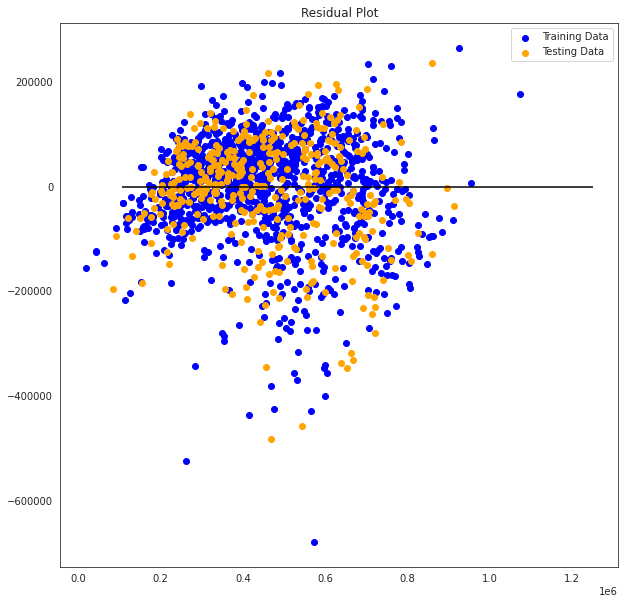

In [68]:
# Plot the Residuals for the Training and Testing data

plt.figure(figsize=(10, 10))
plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [69]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'LogisticRegression.sav'
joblib.dump(regr, filename)

['LogisticRegression.sav']

In [70]:
joblib_LR_model = joblib.load(filename)
joblib_LR_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
test_data = [[3, 2, 1, 1500, 15, 15, 2001, 1, 1, 50, 50, 35, 1, 0, 0]]
Ypredict = joblib_LR_model.predict(test_data)  
Ypredict

array([447707.04690012])